#**ECON F315**

##**Assignment 2 (Calculating the Hurdle Rate/WACC for a listed firm)**

###**Group 2**

1.   <p>Arjun Muthiah&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;&nbsp;2019B3A70374H </p>
2.   <p>Aryan Ramchandra Kapadia &nbsp; 2019B3A70412H</p>
3.   <p>Harsh Vardhan Gupta &emsp;&emsp;&emsp; 2019B3A70630H</p>
4.   <p>Hitaishi Desai &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp; 2019B3A70602H</p>
5.   <p>Hitesh Garg &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp; 2019B3A70466H</p>
6.   <p>Vaishnavi Shrivastava &emsp;&emsp;&ensp;&nbsp; 2019B3A70592H</p>



**Industry** - *Food And Beverage* (We chose *Dairy Sector* within Food and Beverage)

**Target Company** - *Hatsun Agro Product Limited* (HATSUN.NS)

Comparable Companies:


1.   *Heritage Foods Limited (HERITGFOOD.NS)*
2.   *Parag Milk Foods Limited (PARAGMILK.NS*)
3.   *Vadilal Industries Limited (VADILALIND.NS)*



In [114]:
#Install required libraries
!pip install yfinance
!pip install yahoofinancials
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
#import warnings
#warnings.filterwarnings("ignore")

# please load the following excel file to the session storage before execution of the notebook
# link for the file is -> https://docs.google.com/spreadsheets/d/1PwBJV3i9EcfYH2h6aUsKPzzNwn5fnjEo/edit?usp=sharing&ouid=117693318098207767368&rtpof=true&sd=true

In [115]:
#Download stock prices for the security monthly data last 5 years
hatsun_df = yf.download('HATSUN.NS', 
                      start='2017-04-06', 
                      end='2022-04-06', 
                      progress=False,interval ='1mo'
                      ).dropna(axis = 0)
heritage_df = yf.download('HERITGFOOD.NS', 
                      start='2017-04-06', 
                      end='2022-04-06', 
                      progress=False,interval ='1mo'
                      ).dropna(axis = 0)
parag_df = yf.download('PARAGMILK.NS', 
                      start='2017-04-06', 
                      end='2022-04-06', 
                      progress=False,interval ='1mo'
                      ).dropna(axis = 0)
vadilal_df = yf.download('VADILALIND.NS', 
                      start='2017-04-06', 
                      end='2022-04-06', 
                      progress=False,interval ='1mo'
                      ).dropna(axis = 0)

In [116]:
#Download Market index closing prices
nifty_df = yf.download('^BSESN',start='2017-04-06', 
                      end='2022-04-06', 
                      progress=False,interval ='1mo',
)
nifty_df.head()


Open          High           Low         Close  \
Date                                                                 
2017-05-01  30021.490234  31255.279297  29804.119141  31145.800781   
2017-06-01  31117.089844  31522.869141  30680.660156  30921.609375   
2017-07-01  31156.039062  32672.660156  31017.109375  32514.939453   
2017-08-01  32579.800781  32686.480469  31128.019531  31730.490234   
2017-09-01  31769.339844  32524.109375  31081.830078  31283.720703   

               Adj Close  Volume  
Date                              
2017-05-01  31145.800781  282400  
2017-06-01  30921.609375  329400  
2017-07-01  32514.939453  258300  
2017-08-01  31730.490234  241300  
2017-09-01  31283.720703  233900

In [117]:
#Calculate Log returns
nifty_df['Return_NIFTY'] = np.log(nifty_df['Adj Close']/nifty_df['Adj Close'].shift(1))
print(nifty_df['Return_NIFTY'])

Date
2017-05-01         NaN
2017-06-01   -0.007224
2017-07-01    0.050244
2017-08-01   -0.024422
2017-09-01   -0.014180
2017-10-01    0.059847
2017-11-01   -0.001922
2017-12-01    0.027007
2018-01-01    0.054516
2018-02-01   -0.050788
2018-03-01   -0.036201
2018-04-01    0.064361
2018-05-01    0.004597
2018-06-01    0.002858
2018-07-01    0.059804
2018-08-01    0.027240
2018-09-01   -0.064611
2018-10-01   -0.050530
2018-11-01    0.049623
2018-12-01   -0.003487
2019-01-01    0.005209
2019-02-01   -0.010794
2019-03-01    0.075309
2019-04-01    0.009231
2019-05-01    0.017338
2019-06-01   -0.008079
2019-07-01   -0.049792
2019-08-01   -0.003965
2019-09-01    0.035123
2019-10-01    0.037106
2019-11-01    0.016430
2019-12-01    0.011211
2020-01-01   -0.012937
2020-02-01   -0.061426
2020-03-01   -0.262058
2020-04-01    0.134699
2020-05-01   -0.039119
2020-06-01    0.074038
2020-07-01    0.074248
2020-08-01    0.026798
2020-09-01   -0.014613
2020-10-01    0.039812
2020-11-01    0.108402
2020-1

In [118]:
# Calculating Rm by annualizing the average monthly return of the market index
# To calculate Rm we calculated average of monthly return of NIFTY index for a period of 5 years from March, 2017 to March, 2022.
# Then, we calculated Effective Annual Rate using the formula: 
# EAR = (1 + APR/m)^m - 1  here m = 12 (data is on monthly basis)

Rm = pow((1 + nifty_df['Return_NIFTY'].mean()), 12) - 1

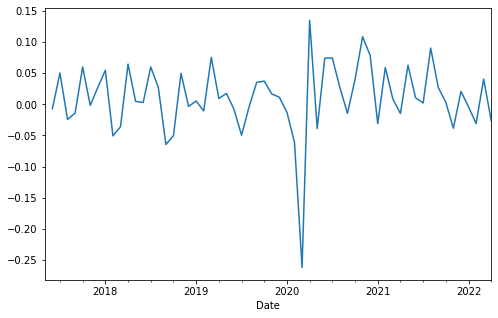

In [119]:
nifty_df['Return_NIFTY'].plot(figsize=(8,5))
plt.show()

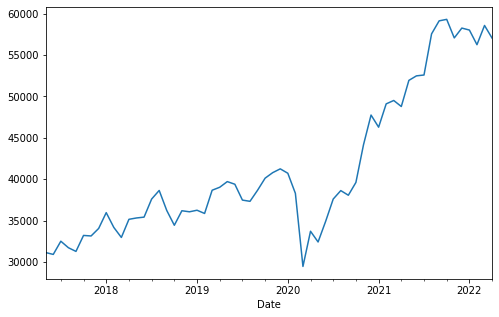

In [120]:
nifty_df['Adj Close'].plot(figsize=(8,5))
plt.show()

In [121]:
nifty_df1 = nifty_df.dropna(axis=0)
nifty_df1.head()

Open          High           Low         Close  \
Date                                                                 
2017-06-01  31117.089844  31522.869141  30680.660156  30921.609375   
2017-07-01  31156.039062  32672.660156  31017.109375  32514.939453   
2017-08-01  32579.800781  32686.480469  31128.019531  31730.490234   
2017-09-01  31769.339844  32524.109375  31081.830078  31283.720703   
2017-10-01  31537.810547  33340.171875  31440.480469  33213.128906   

               Adj Close  Volume  Return_NIFTY  
Date                                            
2017-06-01  30921.609375  329400     -0.007224  
2017-07-01  32514.939453  258300      0.050244  
2017-08-01  31730.490234  241300     -0.024422  
2017-09-01  31283.720703  233900     -0.014180  
2017-10-01  33213.128906  209400      0.059847

In [122]:
#Caclulate log returns
hatsun_df['Return_HATSUN'] = np.log(hatsun_df['Adj Close']/hatsun_df['Adj Close'].shift(1))
heritage_df['Return_HERITAGE'] = np.log(heritage_df['Adj Close']/heritage_df['Adj Close'].shift(1))
parag_df['Return_PARAG'] = np.log(parag_df['Adj Close']/parag_df['Adj Close'].shift(1))
vadilal_df['Return_VADILAL'] = np.log(vadilal_df['Adj Close']/vadilal_df['Adj Close'].shift(1))

print(hatsun_df['Return_HATSUN'])
print(heritage_df['Return_HERITAGE'])
print(parag_df['Return_PARAG'])
print(vadilal_df['Return_VADILAL'])

Date
2017-05-01         NaN
2017-06-01    0.025821
2017-07-01    0.047883
2017-08-01    0.021483
2017-09-01    0.086058
2017-10-01    0.024640
2017-11-01    0.223129
2017-12-01   -0.072905
2018-01-01   -0.039269
2018-02-01   -0.069127
2018-03-01   -0.072236
2018-04-01    0.130254
2018-05-01   -0.066104
2018-06-01   -0.161374
2018-07-01    0.059311
2018-08-01    0.181352
2018-09-01   -0.102487
2018-10-01   -0.135907
2018-11-01    0.003879
2018-12-01    0.004667
2019-01-01    0.063901
2019-02-01   -0.004263
2019-03-01    0.075727
2019-04-01   -0.012526
2019-05-01    0.018347
2019-06-01   -0.002052
2019-07-01   -0.034233
2019-08-01   -0.126327
2019-09-01    0.035915
2019-10-01   -0.035915
2019-11-01   -0.041556
2019-12-01    0.011149
2020-01-01    0.077671
2020-02-01    0.085346
2020-03-01   -0.289205
2020-04-01   -0.017195
2020-05-01    0.032264
2020-06-01    0.226485
2020-07-01    0.009637
2020-08-01    0.124586
2020-09-01    0.045242
2020-10-01    0.026381
2020-11-01    0.168163
2020-1

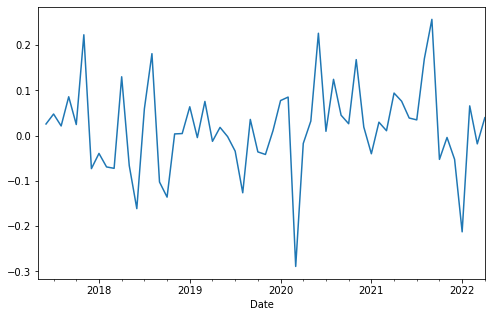

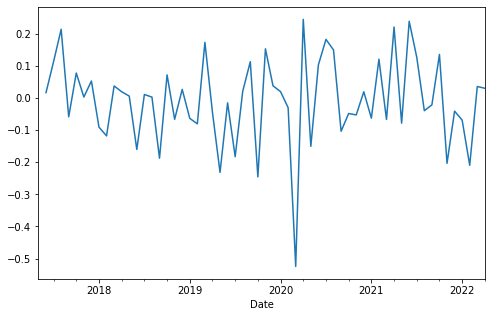

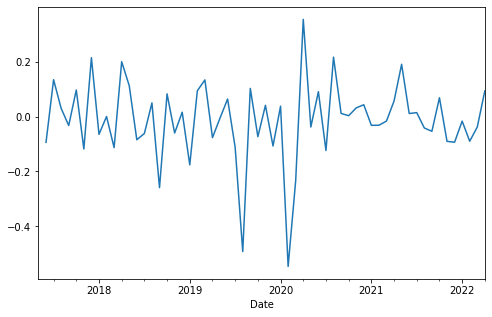

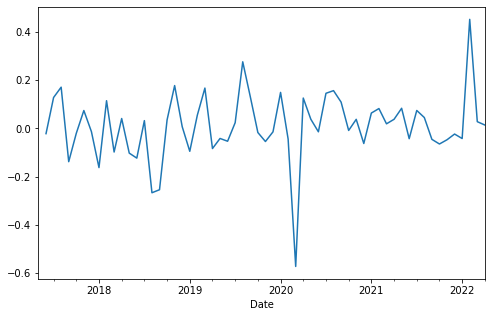

In [123]:
hatsun_df['Return_HATSUN'].plot(figsize=(8,5))
plt.show()
heritage_df['Return_HERITAGE'].plot(figsize=(8,5))
plt.show()
parag_df['Return_PARAG'].plot(figsize=(8,5))
plt.show()
vadilal_df['Return_VADILAL'].plot(figsize=(8,5))
plt.show()

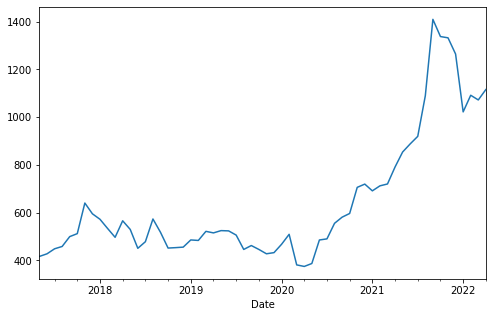

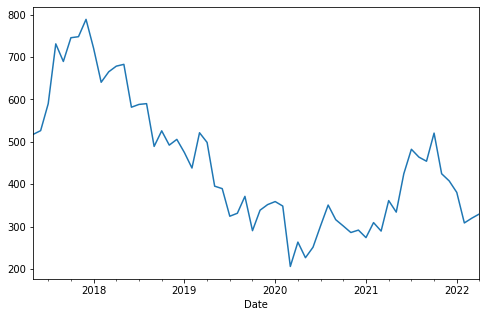

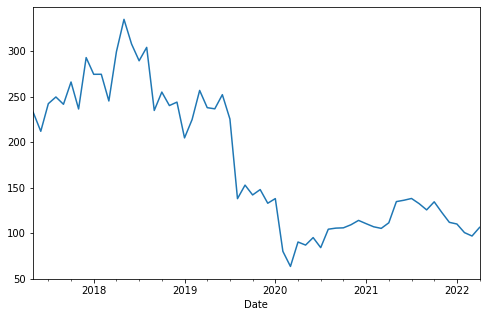

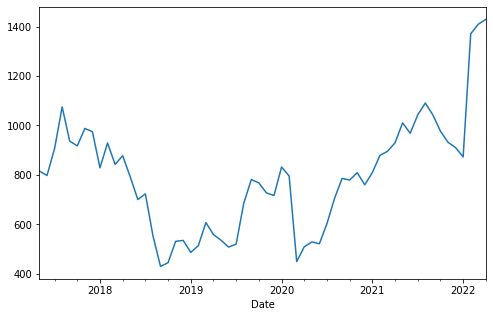

In [124]:
hatsun_df['Adj Close'].plot(figsize=(8,5))
plt.show()
heritage_df['Adj Close'].plot(figsize=(8,5))
plt.show()
parag_df['Adj Close'].plot(figsize=(8,5))
plt.show()
vadilal_df['Adj Close'].plot(figsize=(8,5))
plt.show()

In [125]:
hatsun_returns = hatsun_df['Return_HATSUN']
heritage_returns = heritage_df['Return_HERITAGE']
parag_returns = parag_df['Return_PARAG']
vadilal_returns = vadilal_df['Return_VADILAL']

hatsun_returns.head()
heritage_returns.head()
parag_returns.head()
vadilal_returns.head()

Date
2017-05-01         NaN
2017-06-01   -0.021898
2017-07-01    0.127856
2017-08-01    0.170665
2017-09-01   -0.138003
Name: Return_VADILAL, dtype: float64

In [126]:
nifty_df1_returns = nifty_df1['Return_NIFTY']
nifty_df1_returns.head()

Date
2017-06-01   -0.007224
2017-07-01    0.050244
2017-08-01   -0.024422
2017-09-01   -0.014180
2017-10-01    0.059847
Name: Return_NIFTY, dtype: float64

In [127]:
#new cell
from functools import reduce
dfs = [nifty_df1_returns, hatsun_returns, heritage_returns, parag_returns, vadilal_returns]
returns = reduce(lambda l, r: pd.merge(l, r, how = 'inner', on = 'Date'), dfs) 
returns.head()
returns.describe()

Return_NIFTY  Return_HATSUN  Return_HERITAGE  Return_PARAG  \
count     59.000000      59.000000        59.000000     59.000000   
mean       0.010255       0.016677        -0.007618     -0.013292   
std        0.056384       0.099562         0.137713      0.146152   
min       -0.262058      -0.289205        -0.524659     -0.545694   
25%       -0.014396      -0.037592        -0.067580     -0.080554   
50%        0.008299       0.019113         0.003254     -0.005398   
75%        0.045031       0.064892         0.075180      0.066018   
max        0.134699       0.257226         0.245389      0.353773   

       Return_VADILAL  
count       59.000000  
mean         0.009516  
std          0.139981  
min         -0.571977  
25%         -0.046291  
50%          0.013877  
75%          0.078147  
max          0.451620

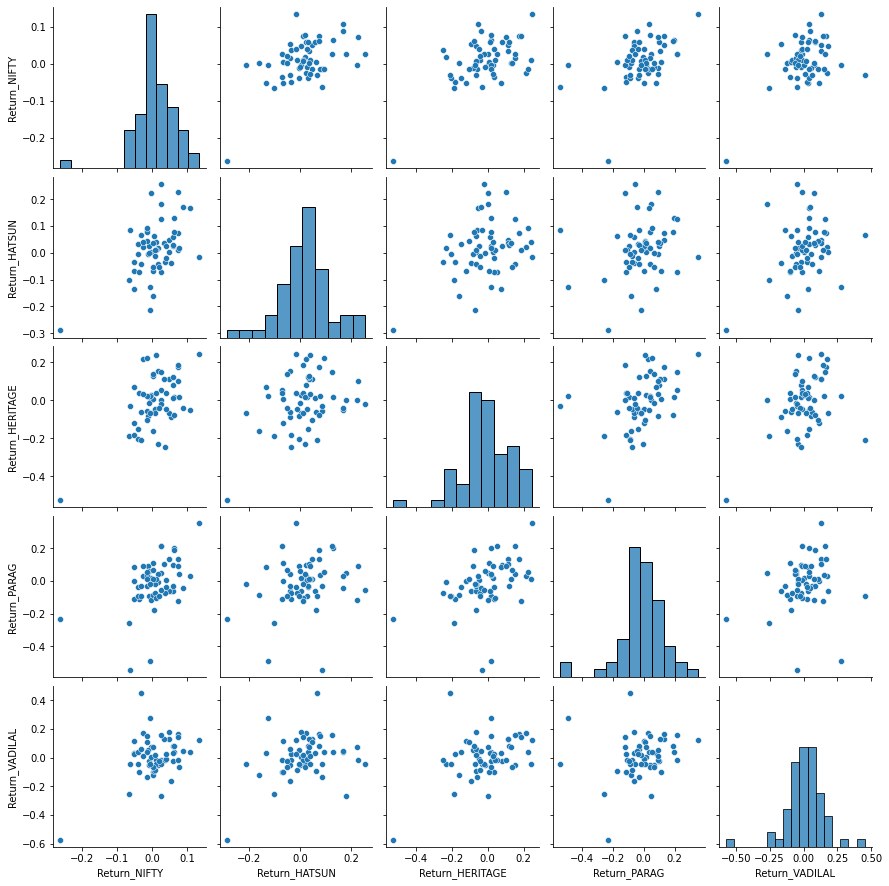

In [128]:
sns.pairplot(returns)
plt.show()

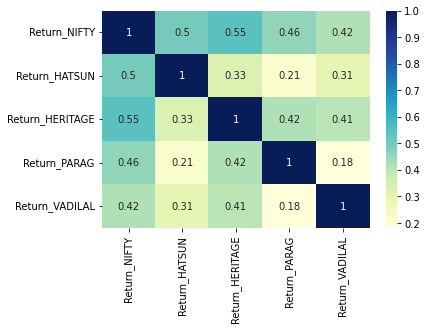

In [129]:
sns.heatmap(returns.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [130]:
x = returns['Return_NIFTY']
y1 = returns['Return_HATSUN']
y2 = returns['Return_HERITAGE']
y3 = returns['Return_PARAG']
y4 = returns['Return_VADILAL']

x_sm = sm.add_constant(x)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#Assumptions of OLS regression
##A linear relationship between the dependent and independent variables - The linear regression model is linear in parameters
##The independent variables are not highly correlated with each other - no multicollinearity
##The variance of the residuals is constant - no heteroskedasticity
##Random sampling of observation and no autocorrelation
##Assumption of Normality of Errors

##Ri = αi + βi(RM) + εi.........Market model

• Ri = Return of security i

• αi = The return from the asset that is not related to the market’s return. This is “alpha” return from the security

• βi = Beta or the return from the security explained by the market index’s return

• RM = The market index’s return

• εi = Error term for past returns not explained by the regression equation

In [131]:
#Regression - Market model 
model_HATSUN = sm.OLS(y1,x_sm)
model_HERITAGE = sm.OLS(y2,x_sm)
model_PARAG = sm.OLS(y3,x_sm)
model_VADILAL = sm.OLS(y4,x_sm)

#OLS estimation or Ordinary Least square Minimizes the sum of squared errors

In [132]:
results_HATSUN = model_HATSUN.fit()
results_HERITAGE = model_HERITAGE.fit()
results_PARAG = model_PARAG.fit()
results_VADILAL = model_VADILAL.fit()

In [133]:
#Regression result
print(results_HATSUN.summary())
print(results_HERITAGE.summary())
print(results_PARAG.summary())
print(results_VADILAL.summary())

                            OLS Regression Results                            
Dep. Variable:          Return_HATSUN   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     19.12
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           5.28e-05
Time:                        19:08:30   Log-Likelihood:                 61.431
No. Observations:                  59   AIC:                            -118.9
Df Residuals:                      57   BIC:                            -114.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0076      0.012      0.661   

In [134]:
beta_reg_HATSUN = results_HATSUN.params['Return_NIFTY']
beta_reg_HERITAGE = results_HERITAGE.params['Return_NIFTY']
beta_reg_PARAG = results_PARAG.params['Return_NIFTY']
beta_reg_VADILAL = results_VADILAL.params['Return_NIFTY']

print(beta_reg_HATSUN, beta_reg_HERITAGE, beta_reg_PARAG, beta_reg_VADILAL)

0.8849495363107689 1.3394009816049295 1.2008199136687747 1.0427586646059732


#Beta for Hatsun stock = 0.8849 and significant at 5%
#Beta for Heritage stock = 1.3394 and significant at 5%
#Beta for Parag stock = 1.2008 and significant at 5%
#Beta for Vadilal stock = 1.0428 and significant at 5%


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2017-06-01 to 2022-04-01
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Return_NIFTY     59 non-null     float64
 1   Return_HATSUN    59 non-null     float64
 2   Return_HERITAGE  59 non-null     float64
 3   Return_PARAG     59 non-null     float64
 4   Return_VADILAL   59 non-null     float64
dtypes: float64(5)
memory usage: 2.8 KB


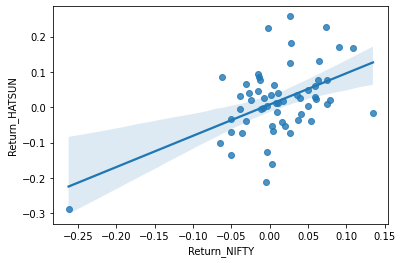

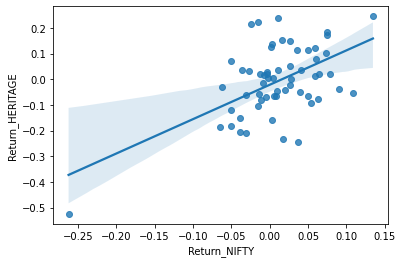

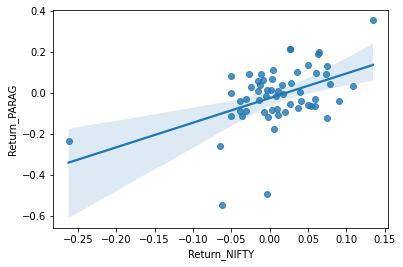

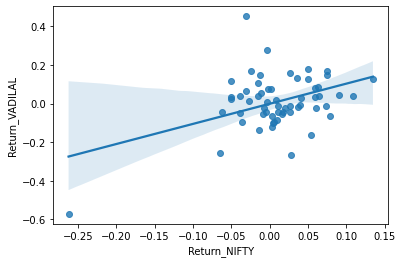

In [135]:
#Regression - Security Characteristic line
returns.info()
sns.regplot(x = 'Return_NIFTY', y = 'Return_HATSUN', data = returns)
plt.show()
sns.regplot(x = 'Return_NIFTY', y = 'Return_HERITAGE', data = returns)
plt.show()
sns.regplot(x = 'Return_NIFTY', y = 'Return_PARAG', data = returns)
plt.show()
sns.regplot(x = 'Return_NIFTY', y = 'Return_VADILAL', data = returns)
plt.show()

In [136]:
print('resid', results_HATSUN.resid, results_HERITAGE.resid, results_PARAG.resid, results_VADILAL.resid)

resid Date
2017-06-01    0.024612
2017-07-01   -0.004182
2017-08-01    0.035493
2017-09-01    0.091004
2017-10-01   -0.035924
2017-11-01    0.217228
2017-12-01   -0.104407
2018-01-01   -0.095115
2018-02-01   -0.031785
2018-03-01   -0.047803
2018-04-01    0.065696
2018-05-01   -0.077775
2018-06-01   -0.171506
2018-07-01   -0.001215
2018-08-01    0.149644
2018-09-01   -0.052912
2018-10-01   -0.098792
2018-11-01   -0.047638
2018-12-01    0.000150
2019-01-01    0.051689
2019-02-01   -0.002313
2019-03-01    0.001480
2019-04-01   -0.028297
2019-05-01   -0.004599
2019-06-01   -0.002505
2019-07-01    0.002228
2019-08-01   -0.130420
2019-09-01   -0.002769
2019-10-01   -0.076354
2019-11-01   -0.063698
2019-12-01   -0.006374
2020-01-01    0.081518
2020-02-01    0.132103
2020-03-01   -0.064899
2020-04-01   -0.143999
2020-05-01    0.059280
2020-06-01    0.153363
2020-07-01   -0.063671
2020-08-01    0.093269
2020-09-01    0.050571
2020-10-01   -0.016453
2020-11-01    0.064630
2020-12-01   -0.057887


count    5.900000e+01
mean    -4.469118e-18
std      8.615666e-02
min     -2.166321e-01
25%     -5.969716e-02
50%     -2.768751e-03
75%      5.365236e-02
max      2.257471e-01
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


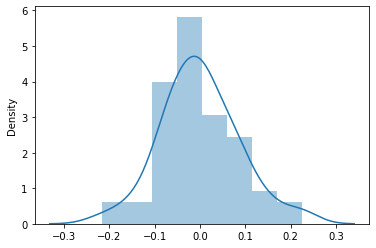

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    5.900000e+01
mean    -5.409985e-18
std      1.151581e-01
min     -2.738532e-01
25%     -7.023906e-02
50%      4.979387e-04
75%      7.073783e-02
max      2.685576e-01
dtype: float64


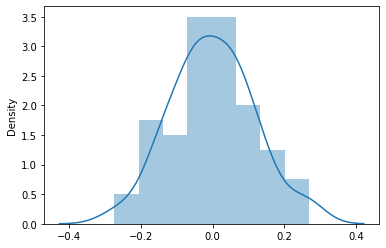

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    59.000000
mean      0.000000
std       0.129523
min      -0.461196
25%      -0.067640
50%       0.013870
75%       0.086332
max       0.217630
dtype: float64


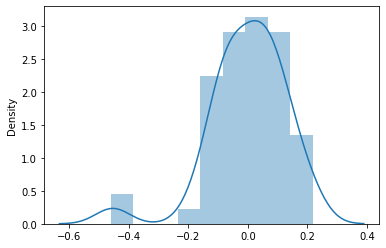

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    5.900000e+01
mean    -1.034954e-17
std      1.270345e-01
min     -2.975364e-01
25%     -6.858465e-02
50%     -1.368584e-02
75%      7.667262e-02
max      4.850500e-01
dtype: float64


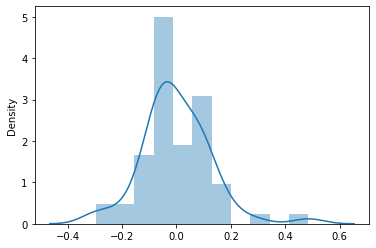

In [137]:
#Histogram of residuals
sns.distplot(results_HATSUN.resid)
print(results_HATSUN.resid.describe())
plt.show()
sns.distplot(results_HERITAGE.resid)
print(results_HERITAGE.resid.describe())
plt.show()
sns.distplot(results_PARAG.resid)
print(results_PARAG.resid.describe())
plt.show()
sns.distplot(results_VADILAL.resid)
print(results_VADILAL.resid.describe())
plt.show()

In [138]:
#Checking for Homoskedasticity of errors (Assumption requirement of linear regression)
#perform White's test
from statsmodels.stats.diagnostic import het_white
white_test_HATSUN = het_white(results_HATSUN.resid,  results_HATSUN.model.exog)
white_test_HERITAGE = het_white(results_HERITAGE.resid,  results_HERITAGE.model.exog)
white_test_PARAG = het_white(results_PARAG.resid,  results_PARAG.model.exog)
white_test_VADILAL = het_white(results_VADILAL.resid,  results_VADILAL.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test_HATSUN)))
print(dict(zip(labels, white_test_HERITAGE)))
print(dict(zip(labels, white_test_PARAG)))
print(dict(zip(labels, white_test_VADILAL)))

{'Test Statistic': 0.13310761338639177, 'Test Statistic p-value': 0.9356125722833053, 'F-Statistic': 0.06331255182185254, 'F-Test p-value': 0.9387171408967668}
{'Test Statistic': 0.30004213838567384, 'Test Statistic p-value': 0.8606898421937637, 'F-Statistic': 0.14312071389565148, 'F-Test p-value': 0.8669654282891133}
{'Test Statistic': 0.45554883333622864, 'Test Statistic p-value': 0.7963038724566276, 'F-Statistic': 0.21787491520080313, 'F-Test p-value': 0.8049045196587001}
{'Test Statistic': 6.188944884008212, 'Test Statistic p-value': 0.04529890395661336, 'F-Statistic': 3.2813291908601836, 'F-Test p-value': 0.04491995541902873}


####***Hatsun*** - **Cannot Reject Null** at **5% significance level** as p-value > 0.05. *Therefore, errors are Homoskedastic as per the White test* (at 5% significance level).

####***Heritage*** - **Cannot Reject Null** at **5% significance level** as p-value > 0.05. *Therefore, errors are Homoskedastic as per the White test* (at 5% significance level).

####***Parag*** - **Cannot Reject Null** at **5% significance level** as p-value > 0.05. *Therefore, errors are Homoskedastic as per the White test* (at 5% significance level).

####***Vadilal*** - **Null is Rejected at 5% significance level** as p-value < 0.05, but **cannot reject null at 4% significance level**. *Therefore, errors are Homoskedastic as per the White test* (at 4% significance level).

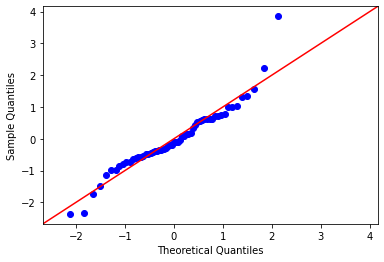

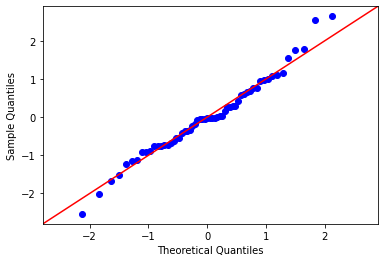

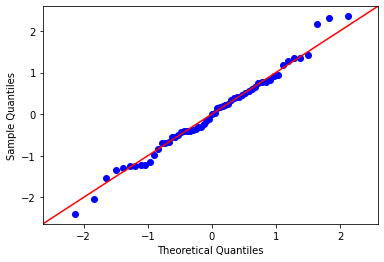

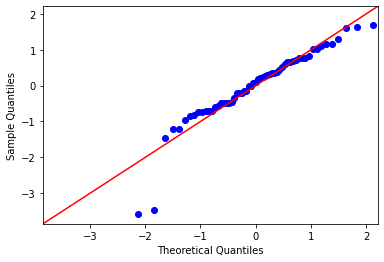

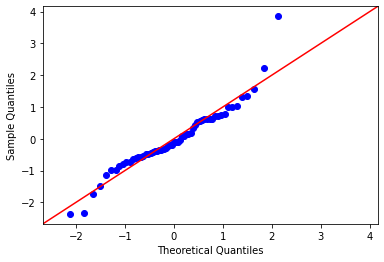

In [139]:
#Testing for Normality of errors (Assumption requirement of linear regression)
sm.qqplot(results_HATSUN.resid, line = '45', fit = True, dist = stats.norm)
sm.qqplot(results_HERITAGE.resid, line = '45', fit = True, dist = stats.norm)
sm.qqplot(results_PARAG.resid, line = '45', fit = True, dist = stats.norm)
sm.qqplot(results_VADILAL.resid, line = '45', fit = True, dist = stats.norm)

In [140]:
print(stats.normaltest(results_HATSUN.resid))
print(stats.normaltest(results_HERITAGE.resid))
print(stats.normaltest(results_PARAG.resid))
print(stats.normaltest(results_VADILAL.resid))

NormaltestResult(statistic=2.095445670076053, pvalue=0.35073552307903)
NormaltestResult(statistic=0.34874454345461364, pvalue=0.8399841371004582)
NormaltestResult(statistic=22.325924594742382, pvalue=1.419015281890875e-05)
NormaltestResult(statistic=13.781161921277626, pvalue=0.0010173226448675849)


We can see that since we are plotting the data with the theoretical quantiles of a normal distribution, we are getting almost a straight line, though some points are not exactly on the line.
The D’Agostino’s K-squared test result suggests that:

For Hatsun, the null hypothesis that the distribution is normal cannot be rejected at 1% significance level.

For Heritage, the null hypothesis that the distribution is normal cannot be rejected at 1% significance level.

For Parag, the null hypothesis that the distribution is normal is rejected at 1% significance level.

For Vadilal, the null hypothesis that the distribution is normal is rejected at 1% significance level.

#Calculating The Debt/Equity Ratio

In [141]:
# Getting data for market cap for each ticker from Yahoo Finance
HATSUN_mcap = yf.Ticker('HATSUN.NS').info['marketCap']
HERITAGE_mcap = yf.Ticker('HERITGFOOD.NS').info['marketCap']
PARAG_mcap = yf.Ticker('PARAGMILK.NS').info['marketCap']
VADILAL_mcap = yf.Ticker('VADILALIND.NS').info['marketCap']

# As market cap of all companies exceeds INR 4 Billion, we took tax rate to be 30%, as mentioned here -> https://taxsummaries.pwc.com/india/corporate/taxes-on-corporate-income
tax_rate = 30/100

# Obtained Total Debt for each of these companies from Yahoo Finance (in the Financials Tab, in the Balance Sheet, the data for 30 Mar 2021)
# e.g. for HATSUN, data was obtained from here -> https://finance.yahoo.com/quote/HATSUN.NS/balance-sheet?p=HATSUN.NS
HATSUN_debt = 16215392000
HERITAGE_debt = 684200000
PARAG_debt = 3836830000
VADILAL_debt = 1577339000

# Calculate Debt/Equity Ratio
#These values may change on a future execution, as market capital gets updated
HATSUN_DBE = HATSUN_debt/HATSUN_mcap
HERITAGE_DBE = HERITAGE_debt/HERITAGE_mcap
PARAG_DBE = PARAG_debt/PARAG_mcap
VADILAL_DBE = VADILAL_debt/VADILAL_mcap

#Calculating Unlevered Beta

In [142]:
# calcultaing unlevered betas
beta_unlevered_HATSUN = beta_reg_HATSUN/(1 + ((1 - tax_rate) * HATSUN_DBE))
beta_unlevered_HERITAGE = beta_reg_HERITAGE/(1 + ((1 - tax_rate) * HERITAGE_DBE))
beta_unlevered_PARAG = beta_reg_PARAG/(1 + ((1 - tax_rate) * PARAG_DBE))
beta_unlevered_VADILAL = beta_reg_VADILAL/(1 + ((1 - tax_rate) * VADILAL_DBE))

#These values may change on a future execution, as market capital gets updated

In [143]:
# calculate average of unlevered betas
unlev_beta_list = [beta_unlevered_HERITAGE, beta_unlevered_PARAG, beta_unlevered_VADILAL]
avg_unlevered_beta = sum(unlev_beta_list) / len(unlev_beta_list)

#This value may change on a future execution, as market capital gets updated

In [144]:
#calculate relevered beta for target company
beta_levered_HATSUN = avg_unlevered_beta * (1 + ((1 - tax_rate) * HATSUN_DBE))

#This value may change on a future execution, as market capital gets updated

#Risk Free Rate

In [145]:
# To calculate Rf, we calculated average of monthly YTM of 91 days treasury bills for a period of 5 years from March, 2017 to March, 2022.
# These values were APRs and hence we averaged them and divided the avg by 12 to get the per period average value
# Then, we calculated Effective Annual Rate using the formula: 
# EAR = (1 + APR/m)^m - 1  here m = 12 (data is on monthly basis)
# we got this data from EPWRF, link -> https://epwrfits.in/index.aspx

ytm_monthly = pd.read_excel('Rf.xlsx', skiprows = 0, header = 1)['YTM (in Per Cent)']/100

# link for this excel file is -> https://docs.google.com/spreadsheets/d/1PwBJV3i9EcfYH2h6aUsKPzzNwn5fnjEo/edit?usp=sharing&ouid=117693318098207767368&rtpof=true&sd=true
# please load it into the session storage before execution of this cell

Rf = pow((1 + ytm_monthly.mean()/12), 12) - 1
Rf

0.05045921352690996

The Risk Free rate comes out to be **5.0459%**

#Cost Of Equity Capital

In [146]:
#cost of equity capital

coec_HATSUN = Rf + beta_levered_HATSUN*(Rm - Rf)
coec_HATSUN

0.1394601407484291

Cost of Equity Capital for HATSUN comes out to be **13.94601%**

(This value may change on a future execution, as market capital gets updated)

#Cost Of Debt

In [147]:
#Cost of debt

# Obtained EBIT Values and Interest Expense for each of these companies from Yahoo Finance (in the Financials Tab, in the Income Statement, the data for 30 Mar 2021)
# e.g. for HATSUN, data was obtained from here -> https://finance.yahoo.com/quote/HATSUN.NS/financials?p=HATSUN.NS
HATSUN_ebit = 4735481000
HERITAGE_ebit = 2210790000
PARAG_ebit = 854360000
VADILAL_ebit = 276385000

HATSUN_intex = 1093952000
HERITAGE_intex = 185610000
PARAG_intex = 447120000
VADILAL_intex = 199537000

# Calculating Interest Coverage Ratio

HATSUN_intcover = HATSUN_ebit/HATSUN_intex
HERITAGE_intcover = HERITAGE_ebit/HERITAGE_intex
PARAG_intcover = PARAG_ebit/PARAG_intex
VADILAL_intcover = VADILAL_ebit/VADILAL_intex

print(HATSUN_intcover)
print(HERITAGE_intcover)
print(PARAG_intcover)
print(VADILAL_intcover)

#Using the interest coverage ratio, we obtained the corresponsing credit default spreads from table 8.6 at http://pages.stern.nyu.edu/~adamodar/New_Home_Page/valquestions/syntrating.htm

HATSUN_cds = 1.8/100       #A
HERITAGE_cds = 0.75/100    #AAA
PARAG_cds = 4.75/100       #B+
VADILAL_cds = 8/100        #B-

4.328783164160767
11.910942298367544
1.9108069422079084
1.3851315796067898


In [148]:
#Hatsun's cost of debt
cod_HATSUN = Rf + HATSUN_cds
cod_HATSUN

0.06845921352690996

Cost of Debt for HATSUN comes out to be **6.8459%**

#Weighted Average Cost of Capital

In [149]:
#WACC
#mcap = E, debt = D, V = D + E

#wb = D/(D+E)
HATSUN_wb = HATSUN_debt/(HATSUN_debt + HATSUN_mcap)

#ws = E/(D+E)
HATSUN_ws = HATSUN_mcap/(HATSUN_debt + HATSUN_mcap)

# Using the WACC formula, WACC = wb*(1-t)*cod + ws*coec
HATSUN_wacc = ((1 - tax_rate) * HATSUN_wb * cod_HATSUN) + (HATSUN_ws * coec_HATSUN)

print(HATSUN_wacc)

0.1336181020528081


WACC for Hatsun Agro Product Limited comes out to be **13.3618%**

(The value may change on a future execution, as market capital gets updated)